# Imports and running the required files

In [2]:
%run Preprocess.ipynb
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional,LSTM,Embedding

C:\Users\mangu\AppData\Local\Temp\ipykernel_15232\1802624429.py:49: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed'] = df['processed'].str.replace('http[^\s]*',"")
C:\Users\mangu\AppData\Local\Temp\ipykernel_15232\1802624429.py:73: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed'] = df['processed'] .str.replace('[...…]','').str.split().apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))


# Building the model and Predicting the results

In [3]:
def baseline_model(X,Y, classes):
    model=Sequential()
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    ep = model.fit(X, Y, batch_size=64, epochs=10, verbose = 1, validation_data=(X_valid, y_valid))
    return model, ep

In [4]:
baselineModel, base_his = baseline_model(X_train,y_train, 3)

Epoch 1/10
238/238 [==============================] - 2s 3ms/step - loss: 18.5288 - accuracy: 0.3668 - val_loss: 8.1385 - val_accuracy: 0.3764
Epoch 2/10
238/238 [==============================] - 1s 2ms/step - loss: 4.9116 - accuracy: 0.3939 - val_loss: 3.3712 - val_accuracy: 0.4127
Epoch 3/10
238/238 [==============================] - 1s 2ms/step - loss: 2.3041 - accuracy: 0.4048 - val_loss: 1.7949 - val_accuracy: 0.4238
Epoch 4/10
238/238 [==============================] - 0s 2ms/step - loss: 1.4350 - accuracy: 0.4107 - val_loss: 1.3588 - val_accuracy: 0.3701
Epoch 5/10
238/238 [==============================] - 0s 2ms/step - loss: 1.2322 - accuracy: 0.4283 - val_loss: 1.2100 - val_accuracy: 0.4038
Epoch 6/10
238/238 [==============================] - 0s 2ms/step - loss: 1.1659 - accuracy: 0.4328 - val_loss: 1.1872 - val_accuracy: 0.4206
Epoch 7/10
238/238 [==============================] - 0s 2ms/step - loss: 1.1395 - accuracy: 0.4405 - val_loss: 1.1807 - val_accuracy: 0.4033
Epoch

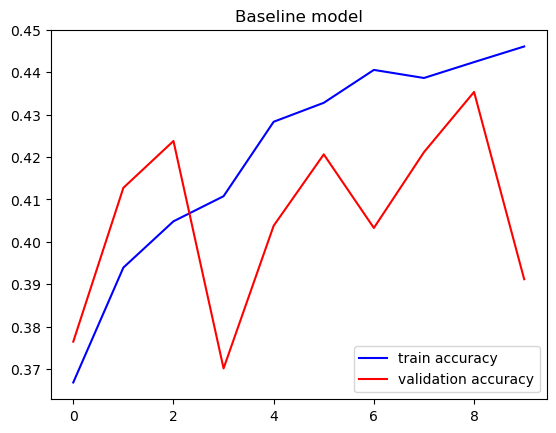

In [5]:
#Plotting the training and validation accuracy
plt.plot(base_his.history['accuracy'],c='b',label='train accuracy')
plt.plot(base_his.history['val_accuracy'],c='r',label='validation accuracy')
plt.title("Baseline model")
plt.legend(loc='lower right')
plt.show()

In [6]:
#Predicting the model on the test data and getting the classification report
y_pred = np.argmax(baselineModel.predict(X_test), axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

60/60 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.04      0.38      0.07        56
           1       0.51      0.50      0.51       877
           2       0.55      0.30      0.39       968

    accuracy                           0.39      1901
   macro avg       0.37      0.39      0.32      1901
weighted avg       0.52      0.39      0.43      1901

